In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from keras.utils.np_utils import to_categorical
from NeuralNetDev.optimizer import Optimizer
from NeuralNetDev.Trainer import l_layer_dnn_model
from NeuralNetDev.preprocessing import Normalizer
from planar_utils import load_planar_dataset , load_extra_datasets , plot_decision_boundary

plt.rcParams["figure.figsize"] = (8,5.5)

## EXTRA DATASETS ##

X_train-Shape:  (2, 200)
Y_train-Shape:  (1, 200)


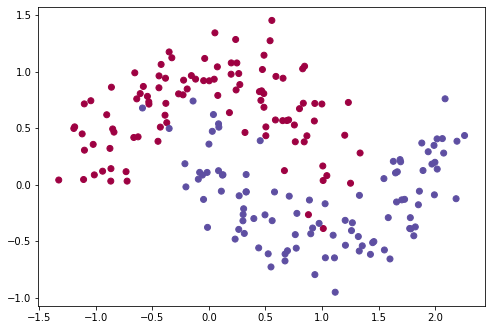

In [2]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datasets = {
    "noisy_circles": noisy_circles,
    "noisy_moons": noisy_moons,
    "blobs": blobs,
    "gaussian_quantiles": gaussian_quantiles,
    "no_structure": no_structure
}
dataset = "noisy_moons"
X_train , Y_train = datasets[dataset]
X_train = X_train.T
Y_train = Y_train.reshape(1 , Y_train.shape[0])
plt.scatter(X_train[0 , :] , X_train[1 , :], c=Y_train, cmap=plt.cm.Spectral)
print("X_train-Shape: " , X_train.shape)
print("Y_train-Shape: " , Y_train.shape)
if dataset == "blobs":
    Y_categorical = to_categorical(Y_train).T
    Y_categorical = Y_categorical.reshape(Y_categorical.shape[0] , Y_categorical.shape[1])
    print("Y_categorical-Shape: " , Y_categorical.shape)

## PLANAR DATASET ##

In [7]:
X_train , Y_train = load_planar_dataset()
print("X-Shape: " , X_train.shape)
print("Y-Shape: " , Y_train.shape)

X-Shape:  (2, 400)
Y-Shape:  (1, 400)


## CAT DATASET ##

In [17]:
train_dataset = h5py.File('C:/Users/parij/Downloads/train_catvnoncat.h5', "r")
X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('C:/Users/parij/Downloads/test_catvnoncat.h5', "r")
X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
Y_test = np.array(test_dataset["test_set_y"][:]) 
print("X_train shape: " , X_train.shape)
print("Y_train Shape: " , Y_train.shape)
print("X_test shape: " , X_test.shape)
print("Y_test Shape: " , Y_test.shape)

X_train shape:  (209, 64, 64, 3)
Y_train Shape:  (209,)
X_test shape:  (50, 64, 64, 3)
Y_test Shape:  (50,)


## NORMALIZING THE CAT DATASET ##

In [107]:
X_train = X_train.reshape(X_train.shape[0] , -1).T
X_test = X_test.reshape(X_test.shape[0] , -1).T
Y_train = Y_train.reshape(1 , -1)
Y_test = Y_test.reshape(1 , -1)
X_train = X_train / 255.0
X_test = X_test / 255.0
# norm = Normalizer(X_train)
# X_train = norm.normalize(X_train)
# X_test = norm.normalize(X_test)
print("X_train shape: " , X_train.shape)
print("Y_train Shape: " , Y_train.shape)
print("X_test shape: " , X_test.shape)
print("Y_test Shape: " , Y_test.shape)

X_train shape:  (2, 200)
Y_train Shape:  (1, 200)
X_test shape:  (50, 12288)
Y_test Shape:  (1, 50)


## SETTING UP PARAMETERS AND OPTIMIZERS ##

In [73]:
layers = [20 , 7 , 5 , 1]
learning_rate = 0.000075
mini_batch_size = None
lambd = 0.0
moment = Optimizer.momentum(learning_rate)
adam = Optimizer.Adam(learning_rate)
rmsprop = Optimizer.RMSProp(learning_rate)
iterations = 10000
validation_data = None

## SETTING UP THE MODEL AND TRAINING IT ##

In [74]:
model = l_layer_dnn_model(X_train , Y_train , layers ,learning_rate, lambd=lambd, mini_batch_size=mini_batch_size, iterations=iterations , validation_data=validation_data, optimizer=adam)

[2, 20, 7, 5, 1]


In [75]:
model.train()

10000\10000, batch= ..., train-accuracy: 96.28210810727927



In [76]:
#print("Test accuracy: " , 100 - np.mean(np.abs(model.predict(X_test) - Y_test))*100)
print("Train accuracy: " , 100 - np.mean(np.abs(model.predict(X_train) - Y_train))*100)


Train accuracy:  98.5


<Figure size 2304x1296 with 0 Axes>

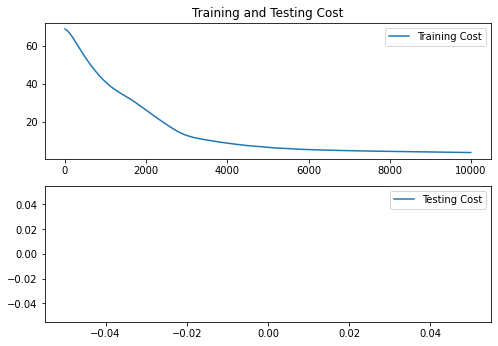

In [77]:
plt.figure(figsize=(32 , 18))
fig , axis = plt.subplots(2 , 1)
axis[0].plot(model.train_cost[:] , label="Training Cost")
axis[0].set_title("Training and Testing Cost")
axis[0].legend()
axis[1].plot(model.test_cost , label="Testing Cost")
axis[1].legend()
plt.show()

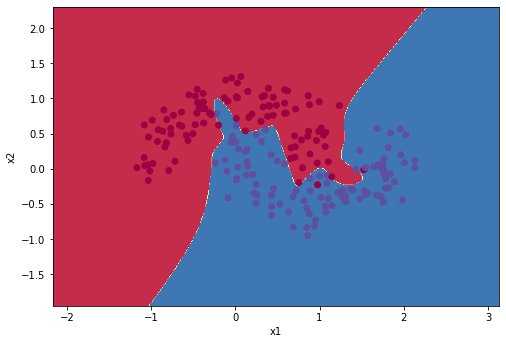

In [78]:
plot_decision_boundary(lambda x: model.predict(x.T , True) , X_train , Y_train)

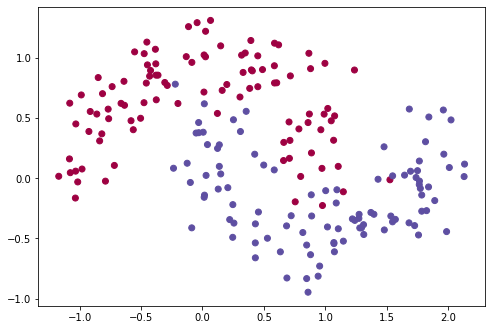

In [79]:
plt.scatter(X_train[0 , :] , X_train[1 , :] , c=Y_train , cmap=plt.cm.Spectral)